In [2]:
#basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#sklearn helper
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix



#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [3]:
def accuracy(pred,actual):
    return round(np.mean(pred == actual),3)

In [4]:
#Print scores
def conf(y_val,y_val_pred):
    print("Scores")
    print("########################")
    print("Accuracy on Val:", round(accuracy(y_val_pred,y_val),3))
    print("f1 on Val:", round(f1_score(y_val,y_val_pred),3))
    print("recall on Val:", round(recall_score(y_val,y_val_pred),3))
    print("precision on Val:", round(precision_score(y_val,y_val_pred),3))
    print("########################")
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_names = ['Successful Pregnancy', 'Pregnancy Loss']
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Val Confusion Matrix')
    plt.show()

In [5]:
data = pd.read_csv('DOWNSAMPLEcleanDataApr22.csv')
data.head()

,LACT,ai1_DIM,outcome1AI,tmsbred,pregnancy_DIM,ABORT,INDGST,INJURY,KETOSIS,lame,LDA,MAST,MET,MFEVER,PYO,PNEU,rtp,calvBCS,milkavg30,milkavg60,milkavg100,nadirDIM,nadirBCS,disease_events,milkmonth1,milkmonth2,milkmonth3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,3,88,1,2,88.0,1.0,0,0,0,0,0,0,0,0,0,0,0,3.40,75.55,93.15,98.14,19,2.7,0,75.547,110.761,111.348,3.4,3.40,3.40,3.40,3.40,3.40,3.20,3.20,3.10,3.10,3.00,3.00,3.00,2.9,2.80,2.8,2.80,2.80,2.80,2.70,2.80,2.80,2.80,2.80,2.80,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.8,2.8,2.80,2.80,2.8,2.8,2.80,2.8,2.80,2.80,2.80,2.80,2.8,2.80,2.8,2.8,2.80,2.70,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80,2.90,2.90,2.90,2.90,2.90,3.00,2.90,2.90,2.90,2.9,2.9,2.90,2.90,2.90,2.90,2.90,2.80,2.80,2.80,2.90,2.90,2.90,2.90,2.90,2.9,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90
1,1,80,1,1,80.0,0.0,0,0,0,0,0,0,0,0,0,0,0,3.45,75.88,83.93,91.80,76,2.8,0,75.878,92.535,104.831,NaN,3.10,2.80,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.9,2.90,2.9,2.80,2.70,2.70,2.70,2.70,2.70,2.70,2.70,2.60,2.70,2.70,2.70,2.70,2.70,2.60,3.10,3.05,3.0,3.0,3.05,3.05,3.0,3.0,2.95,2.7,2.85,2.85,2.85,2.85,2.9,2.90,2.9,2.9,2.90,2.90,2.95,2.90,2.90,2.90,3.00,3.00,3.00,3.00,3.00,3.00,3.10,3.10,3.0,3.00,3.05,3.05,3.00,2.95,3.00,3.00,2.95,2.90,2.90,2.90,2.85,2.85,2.9,2.9,2.90,2.90,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.9,2.90,2.95,2.95,2.95,2.95,2.95,2.95,2.95
2,2,60,0,4,160.0,0.0,0,0,0,0,0,1,0,0,0,0,0,3.35,86.75,88.61,98.34,65,2.7,0,86.746,95.787,109.137,NaN,3.30,3.40,3.30,3.30,3.20,3.20,3.20,3.20,3.30,3.30,3.20,3.20,3.2,3.10,3.1,3.10,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.90,2.90,2.90,2.90,2.80,2.80,2.8,2.8,2.80,2.80,2.8,2.8,2.80,2.8,2.80,2.80,2.80,2.80,2.8,2.80,2.8,2.8,2.80,2.80,2.80,2.80,2.80,2.90,2.90,2.90,2.90,2.80,2.80,2.80,2.80,2.80,2.8,2.80,2.70,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.8,2.8,2.80,2.80,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.9,2.90,2.90,2.90,2.90,2.90,2.90,NaN,NaN
3,1,80,1,1,80.0,0.0,0,0,0,0,0,0,0,0,0,0,0,3.50,48.71,54.50,60.24,99,3.4,0,48.712,60.694,69.263,3.5,3.55,3.55,3.55,3.60,3.60,3.60,3.55,3.55,3.55,3.55,3.55,3.50,3.5,3.45,3.5,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.40,3.45,3.40,3.4,3.4,3.40,3.40,3.5,3.5,3.50,3.5,3.50,3.50,3.50,3.50,3.4,3.40,3.4,3.4,3.45,3.45,3.45,3.45,3.50,3.50,3.50,3.45,3.45,3.30,3.30,3.30,3.30,3.30,3.3,3.50,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.5,3.5,3.50,3.50,3.50,3.30,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.50,3.50,3.5,3.50,3.55,3.55,3.55,3.55,3.55,3.40,3.40
4,1,108,1,2,108.0,0.0,0,0,0,0,0,0,0,0,0,0,0,3.67,45.05,57.21,61.82,46,3.4,0,45.051,69.367,70.035,3.5,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.40,3.40,3.40,3.35,3.4,3.45,3.4,3.40,3.40,3.40,3.35,3.45,3.40,3.40,3.35,3.35,3.35,3.35,3.40,3.40,3.40,3.45,3.60,3.60,3.6,3.6,3.60,3.60,3.6,3.6,3.50,3.6,3.45,3.40,3.35,3.40,3.4,3.35,3.3,3.3,3.35,3.40,3.40,3.40,3.45,3.45,3.45,3.40,3.45,3.45,3.45,3.45,3.45,3.45,3.5,3.45,3.45,3.45,3.50,3.45,3.50,3.50,3.50,3.55,3.50,3.50,3.45,3.45,3.5,3.5,3.45,3.45,3.40,3.40,3.40,3.45,3.45,3.45,3.50,3.50,3.50,3.50,3.50,3.5,3.45,3.50,3.50,3.50,3.50,3.50,3.45,3.50


In [6]:
X = data.drop('ABORT', axis = 1)
y = data['ABORT']
X.shape, y.shape

((790, 127), (790,))

### Basic Modeling 

In [7]:
#train, val, test STRATIFIED splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y , test_size=0.15 ,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  stratify=y_train, test_size=0.177,random_state=42)
print("train shapes: " , X_train.shape, y_train.shape)
print("val shapes: ",X_val.shape, y_val.shape)
print("test shapes: ",X_test.shape, y_test.shape)

train shapes:  (552, 127) (552,)
val shapes:  (119, 127) (119,)
test shapes:  (119, 127) (119,)


In [8]:
#take care of nans -> simple mean for now
X_train = X_train.fillna(X_train.mean())
X_val = X_val.fillna(X_val.mean())
X_test = X_test.fillna(X_test.mean())

Scores
########################
Accuracy on Val: 0.79
f1 on Val: 0.79
recall on Val: 0.783
precision on Val: 0.797
########################


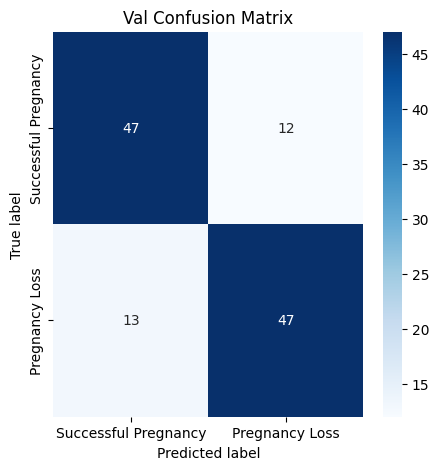

In [9]:
#Linear Regresion
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)

y_val_pred = lr.predict(X_val)
y_train_pred = lr.predict(X_train)
conf(y_val,y_val_pred)

Scores
########################
Accuracy on Val: 0.697
f1 on Val: 0.69
recall on Val: 0.667
precision on Val: 0.714
########################


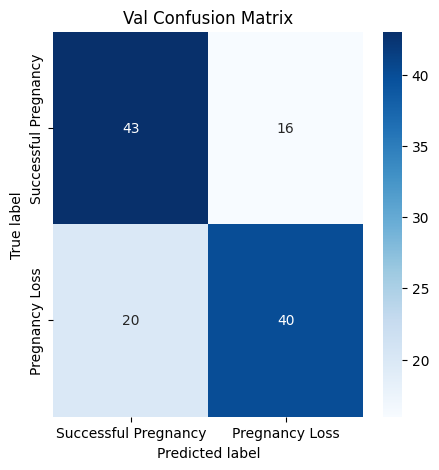

In [10]:
#SVM
svc = SVC(max_iter=-1, kernel = 'rbf')
svc.fit(X_train, y_train)

y_val_pred = svc.predict(X_val)
y_train_pred = svc.predict(X_train)
conf(y_val,y_val_pred)

Scores
########################
Accuracy on Val: 0.79
f1 on Val: 0.806
recall on Val: 0.867
precision on Val: 0.754
########################


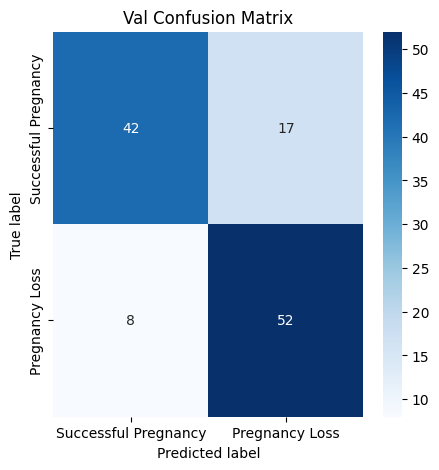

In [11]:
#Random Forest
rf = RandomForestClassifier(n_estimators=10000)
rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)
y_train_pred = rf.predict(X_train)
conf(y_val,y_val_pred)

Scores
########################
Accuracy on Val: 0.807
f1 on Val: 0.816
recall on Val: 0.85
precision on Val: 0.785
########################


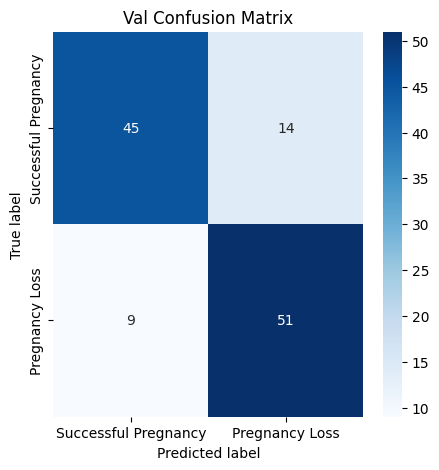

In [14]:
#XGBoost
xgb = xgboost.XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)

y_val_pred = xgb.predict(X_val)
y_train_pred = xgb.predict(X_train)
conf(y_val,y_val_pred)

I move on with XGBoost because it is the fastest to train and has the best scores

### Feature Selection for  XGBoost

##### PCA 
I changed the 100 bcs columns to 50 principle components columns. I tested many different amounts of Principle Components to add and settled on 50

In [23]:
#PCA. Only fit on train
numberPC = 50
X_trainBCS = X_train.iloc[:, -101:]
pca = PCA(n_components=numberPC, random_state=42)
pca.fit(X_trainBCS)

def transform_PCA_NaN(X,pca):
    X_last_100 = X.iloc[:, -101:]

    X_last_100_pca = pca.transform(X_last_100) #only transform
    X = pd.DataFrame(np.hstack((X.iloc[:, :-101], X_last_100_pca)),
                          columns = list(X.columns[:-51]))
    
    return X

X_train_pca = transform_PCA_NaN(X_train, pca)
X_val_pca = transform_PCA_NaN(X_val, pca)
X_test_pca = transform_PCA_NaN(X_test, pca)

In [24]:
X_val_pca.head()

,LACT,ai1_DIM,outcome1AI,tmsbred,pregnancy_DIM,INDGST,INJURY,KETOSIS,lame,LDA,MAST,MET,MFEVER,PYO,PNEU,rtp,calvBCS,milkavg30,milkavg60,milkavg100,nadirDIM,nadirBCS,disease_events,milkmonth1,milkmonth2,milkmonth3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2.0,96.0,1.0,2.0,96.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.70,84.64,99.44,104.08,43.0,1.9,2.0,84.642,114.234,111.105,7.924243,-0.662592,-0.336948,-0.284271,-0.697656,-0.107369,-0.304694,-0.046641,-0.431776,0.182476,0.500326,0.256674,-0.353325,-0.034584,0.491893,-0.011638,0.455534,0.229788,-0.130801,-0.380281,0.192043,-0.442532,0.031804,0.063625,-0.004811,0.224951,0.058820,-0.298029,-0.326285,0.095305,-0.688302,-0.176195,0.001522,0.003525,0.048586,-0.256531,0.348387,-0.080367,0.022390,-0.007076,0.219745,-0.003526,-0.000577,0.209096,-0.134941,0.295346,0.130126,-0.173381,-0.117686,0.159806
1,1.0,95.0,0.0,5.0,165.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.40,90.63,93.54,94.94,77.0,2.9,2.0,90.632,95.447,97.013,0.280285,-0.442411,0.130043,-0.203424,-0.210596,-0.274433,0.153182,-0.140079,-0.012070,-0.203963,0.003303,0.038003,0.029206,-0.007733,0.104325,-0.053891,-0.010075,-0.018094,0.046241,-0.083103,-0.048582,0.049672,-0.002974,-0.056790,-0.034902,0.042475,0.047083,-0.034408,-0.025555,-0.022807,0.081438,0.084378,-0.070612,-0.015561,0.003361,-0.012132,0.003356,-0.008406,0.061848,-0.007200,-0.011874,-0.002141,-0.038026,-0.010270,0.012225,-0.008557,0.098269,0.001016,0.009318,-0.007683
2,3.0,60.0,0.0,6.0,237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.35,103.91,113.11,122.64,58.0,2.8,0.0,103.908,135.188,131.003,2.648346,-1.321622,0.059598,-0.373979,0.475742,-0.195573,-0.271109,-0.161316,0.110229,-0.138365,-0.358047,-0.116779,0.054907,-0.075489,0.109552,0.089923,-0.076640,-0.180730,-0.062124,-0.191619,0.038693,0.024065,0.086895,-0.008813,-0.119840,-0.050467,-0.021950,-0.002456,0.005744,0.056914,0.032833,0.071003,0.049737,-0.081268,0.051916,-0.015494,0.133151,-0.049870,0.125523,0.034415,0.013364,0.219740,-0.013922,-0.104279,0.130119,-0.069490,-0.192064,-0.096539,0.029547,0.064481
3,1.0,110.0,0.0,3.0,167.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.40,63.11,71.77,74.86,26.0,3.0,2.0,63.112,79.563,75.827,-0.300790,0.240937,0.632780,0.366058,-0.273501,-0.237849,0.002939,0.038098,-0.168675,-0.236407,0.085054,0.160709,0.056925,-0.032062,0.035430,-0.018991,-0.015481,0.123975,-0.036261,0.041371,0.080806,-0.027196,-0.035051,-0.023705,0.025259,0.023413,-0.025661,0.000060,-0.006298,-0.028553,0.033631,-0.021310,-0.031493,-0.031602,0.016211,-0.032069,0.026740,0.027375,0.008472,0.025211,0.035327,-0.016084,0.015367,0.021069,0.006141,-0.026258,-0.021955,0.005890,-0.047077,0.002244
4,1.0,80.0,1.0,4.0,335.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.32,56.60,68.61,76.32,63.0,2.8,2.0,56.601,80.626,86.918,1.001026,-0.684592,0.241672,-0.085996,-0.430736,0.187365,-0.138237,-0.230566,0.209707,0.152794,-0.091348,-0.155122,0.182989,-0.108059,-0.010348,-0.015822,-0.085678,-0.041533,-0.059411,0.117629,0.058175,-0.008109,0.057842,0.026978,-0.095023,-0.085232,-0.060933,0.026879,0.055625,-0.006536,-0.035468,-0.058952,0.017898,-0.011889,0.010105,-0.006902,-0.055237,-0.015622,-0.114705,0.066548,-0.008088,-0.028522,0.039490,-0.012818,-0.016699,0.050493,-0.037719,-0.021294,0.002438,0.062054


###### Feature Select with SelectFromModel

In [27]:
np.random.seed(42)

#best threshold I can find (which is no threshhold)
threshold = 0.000

#fit Select From Model
reduceXGB= xgboost.XGBClassifier(random_state=42)
sfmXGB = SelectFromModel(reduceXGB, threshold=threshold)
sfmXGB.fit(X_train_pca, y_train)

selected_features = X_train_pca.columns[sfmXGB.get_support()]

#Create new subset (ended up just being the same)
X_train_XGB_subset = sfmXGB.transform(X_train_pca)
X_val_XGB_subset = sfmXGB.transform(X_val_pca)

Scores
########################
Accuracy on Val: 0.815
f1 on Val: 0.828
recall on Val: 0.883
precision on Val: 0.779
########################


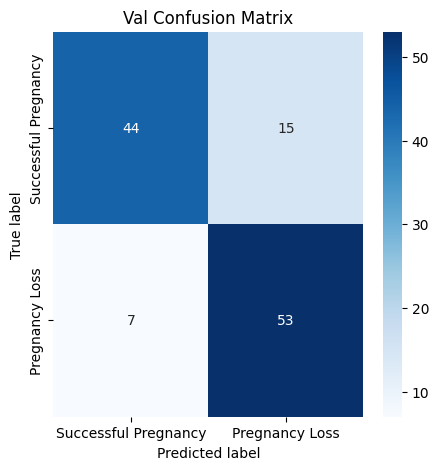

In [28]:
#Test new feature set
featureSelectXGB = xgboost.XGBClassifier(random_state=42)
featureSelectXGB.fit(X_train_XGB_subset,y_train)

y_val_pred = featureSelectXGB.predict(X_val_XGB_subset)
y_train_pred = featureSelectXGB.predict(X_train_XGB_subset)
conf(y_val,y_val_pred)

In [51]:
print("New Shape: " ,X_train_XGB_subset.shape)
selected_features

New Shape:  (552, 76)


Index(['LACT', 'ai1_DIM', 'outcome1AI', 'tmsbred', 'pregnancy_DIM', 'INDGST',
       'INJURY', 'KETOSIS', 'lame', 'LDA', 'MAST', 'MET', 'MFEVER', 'PYO',
       'PNEU', 'rtp', 'calvBCS', 'milkavg30', 'milkavg60', 'milkavg100',
       'nadirDIM', 'nadirBCS', 'disease_events', 'milkmonth1', 'milkmonth2',
       'milkmonth3', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6',
       'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13',
       'PCA_14', 'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20',
       'PCA_21', 'PCA_22', 'PCA_23', 'PCA_24', 'PCA_25', 'PCA_26', 'PCA_27',
       'PCA_28', 'PCA_29', 'PCA_30', 'PCA_31', 'PCA_32', 'PCA_33', 'PCA_34',
       'PCA_35', 'PCA_36', 'PCA_37', 'PCA_38', 'PCA_39', 'PCA_40', 'PCA_41',
       'PCA_42', 'PCA_43', 'PCA_44', 'PCA_45', 'PCA_46', 'PCA_47', 'PCA_48',
       'PCA_49', 'PCA_50'],
      dtype='object')

### Combine Feature Selection and RandomSearch for XGBoost

In [56]:
#XGBoost parameters
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'reg_lambda': [0.1, 1, 10],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'scale_pos_weight': [1, 2, 5]
}

# Score on just f1
scoring = {'f1' : 'f1'}

grid_search_final = RandomizedSearchCV(scoring=scoring, estimator=featureSelectXGB, refit= 'f1', param_distributions=params, n_iter=100,cv=3, verbose=1)
grid_search_final.fit(X_train_XGB_subset, y_train)

print("Best score:", grid_search_final.best_score_)
print("Best parameters:", grid_search_final.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best score: 0.8485696517412936
Best parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1.5, 'colsample_bytree': 1.0}


Scores
########################
Accuracy on Val: 0.807
f1 on Val: 0.819
recall on Val: 0.867
precision on Val: 0.776
########################


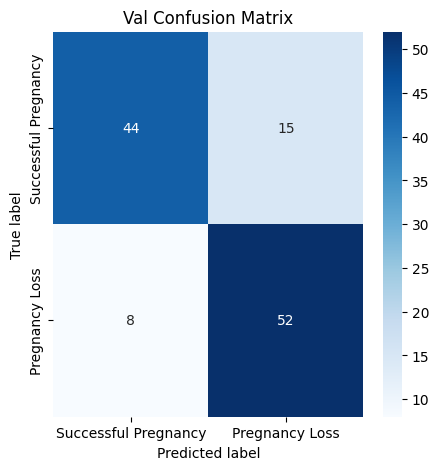

In [60]:
#validating for XGBoost gridsearch with new features
finalXGB = xgboost.XGBClassifier(**grid_search_final.best_params_,random_state=42)
finalXGB.fit(X_train_XGB_subset, y_train)
y_val_pred = finalXGB.predict(X_val_XGB_subset)
conf(y_val,y_val_pred)

This does not perform as well as zero parameters, so I will not use parameters in my final model